# Reto
**Diego Reyna Reyes A0167387**


En este notebook se buscará probar que bots suelen tener una interacción considerable con figuras políticas.

Para lo lograr identificar lo usuarios que tienen una mayor posibilidad de ser bots, me basaré en el [Notebook realizado por HANNAH SUN](https://www.kaggle.com/code/hannahsuny/botnot-project).


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn import preprocessing
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler
!pip install wordcloud
from wordcloud import WordCloud

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Lectura de los datos

Se obtienen los datos del archivo *covid19_tweets.csv*

In [43]:
dataframe = pd.read_csv("covid19_tweets.csv")
dataframe.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [36]:
NullFriends = dataframe[dataframe["user_friends"] == 0]
print('numero de cuentas sin amigos')
len(NullFriends)

numero de cuentas sin amigos


1152

In [62]:
cuentanoverificada = dataframe.loc[dataframe['user_verified'] == False]


In [63]:
conteo = len(cuentanoverificada)
print('numero de cuentas no verificadas')
print(conteo)

numero de cuentas no verificadas
65082


In [67]:
web = dataframe.loc[dataframe['source'] == 'Twitter Web App']
conteo1 = len(web)
print('numero de tuits en web')
print(conteo1)

numero de tuits en web
22974


In [70]:
android = dataframe.loc[dataframe['source'] == 'Twitter for Android']
conteo2 = len(android)
print('numero de tuits en android')
print(conteo2)

numero de tuits en android
16758


In [71]:
iphone = dataframe.loc[dataframe['source'] == 'Twitter for iPhone']
conteo3 = len(iphone)
print('numero de tuits en iphone')
print(conteo3)

numero de tuits en iphone
15824


In [38]:
dataframe.isnull().sum()

user_name               0
user_location       15218
user_description     4357
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            21434
source                 12
is_retweet              0
dtype: int64

In [73]:
botsiphone = dataframe.loc[(dataframe['user_location'].isnull()) & (dataframe['user_description'].isnull()) & (dataframe['user_verified'] == False) & (dataframe['source'] == 'Twitter for iPhone')]
total = len(botsiphone)
print('numero de bots en iphone')
print(total)

numero de bots en iphone
634


In [75]:
botsandroid = dataframe.loc[(dataframe['user_location'].isnull()) & (dataframe['user_description'].isnull()) & (dataframe['user_verified'] == False) & (dataframe['source'] == 'Twitter for Android')]
total = len(botsandroid)
print('numero de bots en android')
print(total)

numero de bots en android
725


In [77]:
botsweb = dataframe.loc[(dataframe['user_location'].isnull()) & (dataframe['user_description'].isnull()) & (dataframe['user_verified'] == False) & (dataframe['source'] == 'Twitter Web App')]
total = len(botsweb)
print('numero de bots en iphone')
print(total)

numero de bots en iphone
848


<BarContainer object of 3 artists>

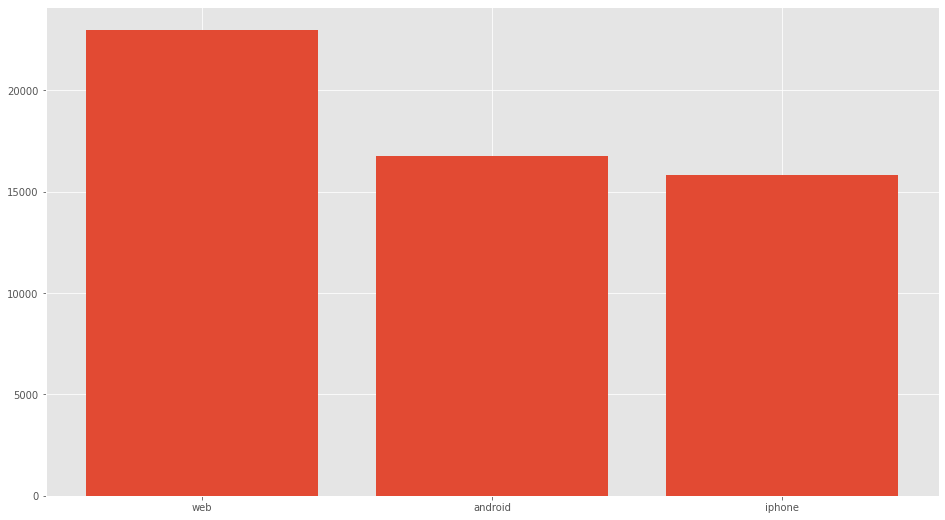

In [88]:
categoria = ['web', 'android', 'iphone']
valores = [22974, 16758, 15824]
plt.bar(categoria, valores)

<BarContainer object of 3 artists>

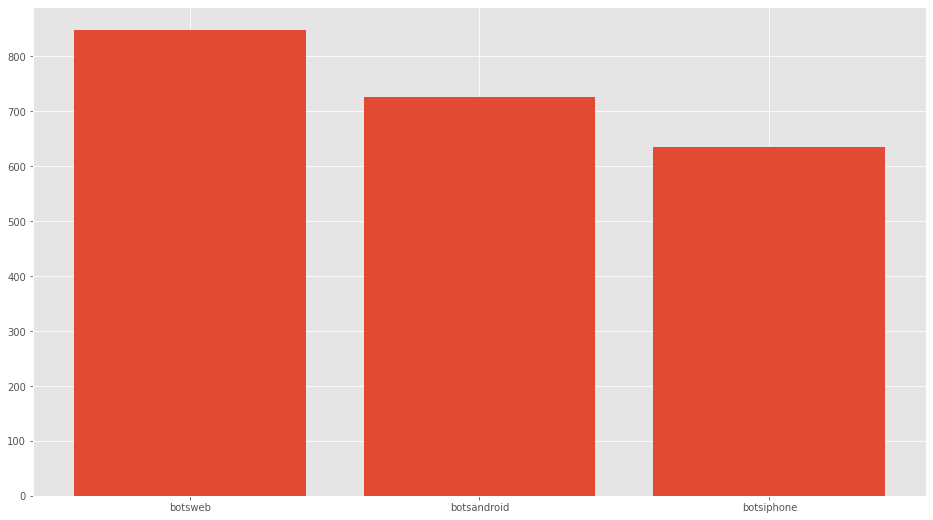

In [85]:
categoria = ['botsweb', 'botsandroid', 'botsiphone']
valores = [848, 725, 634]
plt.bar(categoria, valores)

Conclusion 
Los bots estan mas presente en la apilicacion web de twitter ya que es mas usado la plataforma web. sin embargo, el que tiene mayor porcentaje de bots con respecto a sus usuarios legitimos es android.
Aplique el limpiado de datos y el manejo de pandas para el manejo de csv y matplotlib para realizar graficas.
No fue necesario el k means ya que implicaria abarcar todos los datos o especificar aun mas la busqueda con una restriccion, como la del texto repetido en tuits


## Detección de posibles bots

El primer parámetro para detectar bots, se tomará en cuenta el tiempo entre la creación de la cuenta y su primera publicación.

Para lograr esto, se extraen los datos de las columnas *user_created* y *date*

In [ ]:
dataframe['account_creation_date'] = dataframe['user_created'].str.slice(0, 10)
dataframe['account_creation_date'] = dataframe['account_creation_date'].replace(
    '-', '', regex=True).astype(str)
dataframe.head()

In [ ]:
dataframe['pub_date'] = dataframe['date'].str.slice(0, 10)
dataframe['pub_date'] = dataframe['pub_date'].replace(
    '-', '', regex=True).astype(str)
dataframe.head()

In [ ]:
dataframe['user_created'] = pd.to_datetime(dataframe['user_created'])
print(dataframe['user_created'])
count_dates = dataframe['user_created'].value_counts()
print(count_dates,"<------Esto es count_date")
sorted_dates = count_dates.sort_values(ascending=False)
print(sorted_dates.head(10),"<------Esto es sorted_dates")
fecha_mas_antigua = dataframe['user_created'].min()
print(fecha_mas_antigua)
fechas_mas_antiguas = dataframe.nsmallest(10, 'user_created')['user_created']
print('Las 10 fechas mas antiguas son:\n',fechas_mas_antiguas)
dataframe = dataframe.drop(dataframe.index[-1])
fecha_mas_antigua = dataframe['user_created'].min()
print(fecha_mas_antigua)
fecha_mas_repetida = dataframe['user_created'].value_counts().idxmax()
print(fecha_mas_repetida, "<---Esta es la fecha que mas se repite")
promedio_repeticiones = dataframe['user_created'].value_counts().mean()
print('El promedio de repeticiones de las fechas es:', promedio_repeticiones)
conteos_fechas = dataframe['user_created'].value_counts()
fechas_mas_repetidas = conteos_fechas[conteos_fechas < 3].index.tolist()
print('Las fechas que se repiten más de 5 veces son:', fechas_mas_repetidas[5])
conteos_fechas = dataframe['user_created'].value_counts()
cantidad_fechas_mas_repetidas = sum(conteos_fechas > 3)
print('La cantidad de fechas que se repiten más de 5 veces es:', cantidad_fechas_mas_repetidas)
cantidad_fechas_menos_repetidas = sum(conteos_fechas < 3)
print('La cantidad de fechas que se repiten menos de 5 veces es:', cantidad_fechas_menos_repetidas)


Tras extraer las fechas, se realiza la resta de ambos valores y se encuentra el valor menor para cada cuenta incluida en nuestro dataset

In [ ]:
dataframe["time_create_pub"] = dataframe["pub_date"].astype(int) - dataframe["account_creation_date"].astype(int)
df2_full = dataframe.sort_values(by = "time_create_pub").copy()
df2 = dataframe.groupby("user_name")
df2 = df2.time_create_pub.min()
df2 = pd.DataFrame(df2).sort_values(by = "time_create_pub")
df2.loc[df2['time_create_pub'] > 150000, 'time_create_pub'] = 150000 #Eliminar casos de fechas registradas antes de la creación de twitter

Otro de los parámetros a utilizar es la relación entre usuarios seguidos y seguidores, esto, de acuerdo con lo estipulado con el Notebook mencionado en la introducción; el fundamento viene de que muchas cuentas de bots son utilizadas para seguir a otros bots o a alguena cuenta objetivo.

In [ ]:
df3 = dataframe.copy()
df3['follow_ratio'] = df3["user_friends"]/df3["user_followers"]
df3.loc[np.isnan(df3['follow_ratio']), 'follow_ratio'] = 0
df3.loc[np.isinf(df3['follow_ratio']), 'follow_ratio'] = 0
df3 = df3.groupby("user_name")
df3 = df3.follow_ratio.min()
df3 = pd.DataFrame(df3)
user_data = pd.merge(df2,df3, on = ['user_name'])


Otro parámetro a utilizar es el número de hastags utilizados, ya que el uso de muchos hashtags puede indicar que se busca que la publicación tenga un mayor alcance, que es parte del objetivo de los bots.

In [ ]:
#Encuentra el número de hastags en el texto
def find_hash(text):
  s = ".*"
  has = 0
  temp = re.compile(s)
  #Forma de identificar si el texto es Nan obtenida de:
  #https://www.codespeedy.com/check-if-a-given-string-is-nan-in-python/
  if not text != text:
    for word in text.split(" "):
        a = temp.findall(word)
        if a != []:
            has += 1
  return has

In [ ]:
df4 = dataframe.copy()
df4['n_hashtag'] = df4['hashtags'].apply(find_hash)
df4 = df4.groupby("user_name")
df4 = df4.n_hashtag.mean()
df4 = pd.DataFrame(df4)
user_data = pd.merge(user_data,df4, on = ['user_name'])

Nuestro parámettro final es la presencia de una descripción de usuario, ya que la falta de esta, puede indicar que la cuenta no corresponde a un usuario.

In [ ]:
df5 = dataframe.copy()
df5.loc[df5['user_description'] != df5['user_description'], 'has_description'] = 0
df5.loc[df5['user_description'] == df5['user_description'], 'has_description'] = 1
df5 = df5.groupby("user_name")
df5 = df5.has_description.mean()
df5 = pd.DataFrame(df5)
user_data = pd.merge(user_data,df5, on = ['user_name'])

### Visualización de los datos obtenidos

In [ ]:
user_data.hist()

### Normalización de los datos
Tras haber obtenido los datos, se normalizan a un rango \[0-1\], esto con el objetivo que los 4 parámetros estén en el mismo rango y su contribución a la probabilidad esté completamente definida por los pesos que se le asignen

In [ ]:
scaler = MinMaxScaler()
scaler.fit(user_data[['time_create_pub','follow_ratio','n_hashtag','has_description']])
user_data[['time_create_pub','follow_ratio','n_hashtag','has_description']] = scaler.transform(user_data[['time_create_pub','follow_ratio','n_hashtag','has_description']])


Se asignaron los siguientes pesos:

*time_created_pub* - 2

*follow_ratio* - 1

*n_hashtag* - 1

*has_description* - 1

Para poder obtener un puntaje, el tiempo de creación será restado a 1, debido a que si este tiempo es menor, aumenta la probabilidad de que el usuario se trate de un bot. Paralelamente, el valor de *has_description* está negado para que aquellos usuarios sin descripción tengan una probabilidad mayor. 

In [ ]:
w = [2,1,1,1]
max_probability = 1 * w[0] + 1 * w[1] + 1 * w[2] + 0 * w[3]
user_data["bot_probability"] = ((1 - user_data["time_create_pub"]) * w[0] + user_data["follow_ratio"] * w[1] + user_data["n_hashtag"] * w[2] + (1 - user_data["has_description"]) * w[3])/max_probability
user_data["bot_probability"].hist()

### Selección de posibles bots

Se seleccionaron aquellos usuarios con una probabilidad mayor al 60\% de ser bots.

In [ ]:
possible_bot = user_data[user_data["bot_probability"] > 0.6]
possible_bot["bot_probability"].hist()

## Análisis de las publicaciones

Se mantienen solamente aquellas publicaciones de los usuarios sospechosos

In [ ]:
bot_tweets = pd.merge(possible_bot,dataframe.copy(), on='user_name')

## Generación de nube de palabras
Como parte del análisis, se realiza una nube de palabras para todas las publicaciones registradas, y todas aquellas realizadas por los usuarios sospechosos, con el objetivo de ver si hay una diferencia significativa a simple vista.

Estas nubes de palabras son creadas con base en el tutorial de [datanizing GmbH](https://medium.com/@datanizing/modern-text-mining-with-python-part-2-of-5-data-exploration-with-pandas-ee3456cf6a4) y el código proporcionado por Sergio Ruíz 

In [ ]:
def text_cleaner(text):
    text = re.sub(r"\n"," ", str(text)) 
    text = re.sub (r"\t"," ", str(text))
    text = re.sub (r"\r", " ", str(text))
    text = re.sub(r"(@)|(#)|(RT[\s]+)|(https?:\/\/\S+)|([^a-zA-Z0-9 -])", " ", str(text))
    text = text.strip(" ")
    return text


In [ ]:
def wordclouder(string_column, name):
    Words = ''.join([words for words in string_column])
    wordcloud = WordCloud (width=1000, height = 600, random_state = 10, background_color="white", max_words = 200)
    wordcloud.generate(Words)
    plt.style.use('fivethirtyeight')
    plt.figure(figsize = (20,28))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    wordcloud.to_file(name)
    plt.show()


### Nube de palabras para todos los registros

In [ ]:
dataframe['text'] = dataframe['text'].apply(text_cleaner)
wordclouder(dataframe['text'], "tweets.png")


### Nube de palabras para las publicaciones de los usuarios sospechosos

In [ ]:
bot_tweets['text_clean'] = bot_tweets['text'].apply(text_cleaner)
wordclouder(bot_tweets['text_clean'], "tweets_bot.png")

## Detección de menciones

Para comprobar la interacción entre los usuarios sospechosos y figuras políticas, se encontrarán las menciones que realizan estos usuarios

In [ ]:
#Extrae las menciones dentro de un texto y regresa un string con los usuarios mencionados
def find_at(text):
  s = "@.*"
  att = ""
  temp = re.compile(s)
  for word in text.split(" "):
      a = temp.findall(word)
      if a != []:
          att += " " + a[0]
  return att


### Visuzalización de las menciones

In [ ]:
bot_tweets['at'] = bot_tweets['text'].apply(find_at)

wordclouder(bot_tweets['at'], "tweets_bot_at.png")

### Obtención y contabilización de las menciones

In [ ]:
#Extrae las menciones del texto obtenido por la función text_cleaner(find_at(text))
def get_mentions(text):
  mentions = []
  for word in text.split(" "):
      mentions.append(word.lower())
  return mentions

In [ ]:
mentions = bot_tweets
mentions['at_clean'] = bot_tweets['at'].apply(text_cleaner)

In [ ]:
mentioned = pd.DataFrame(columns = ['user_name', 'mentions'])

for text in mentions['at_clean']:
  for m in get_mentions(text):
    if m != "":
      temp = pd.DataFrame({'user_name' : m, 'mentions' : 0}, index = [0])
      mentioned = pd.concat([mentioned, temp], ignore_index = True)
mentioned = mentioned.groupby("user_name")
mentioned = mentioned.user_name.count()
mentioned = pd.DataFrame({'user_name':mentioned.index, 'count':mentioned.values})
#Ordenar por vnumero de menciones
mentioned = mentioned.sort_values(by = "count", ascending = False)
mentioned = mentioned.reset_index()
mentioned.head()

In [ ]:
#Se obtiene en términos de porcentaje del total de las menciones realizadas por los usuarios
total_mentions = sum(mentioned["count"])
mentioned["percentage"] = mentioned["count"] / total_mentions * 100
mentioned.head(20)

### Resultados

De las menciones encontradas, se busca encontrar que al menos el 30% están relacionadas a una figura política, por lo que se realizó una lista de las menciones más populares que no son políticos. Esta identificación fue realizada manualmente debido a las limitaciones de tiempo, ya que, si se continuara desarrollando este reto, se haría un análisis de la biografía de los usuarios mencionados para determinar si se tratan de figuras políticas

In [ ]:
not_politician = ["who", "cbseindia29", "carpetright", "cnn", "jim", "youtube", "wilfwalshesq", "jordan", "projectlincoln", "mohfw","india","thehill","s","mrchrisfixedodd","news",
                  "drericding","nytimes","bmz","nationalnurses","peta","irish","bund","ani","cp24","sida","mlb","cdcgov","alakh","abc","cbsnews",
                  "rajender","maggienyt","donwinslow","bbcnews","bbnaija","foxnews","eatala","elijahschaffer","fda","whowpro","officialfv",
                  "us","ndtv","airasia","nbcnews","dhsgov","shelbycotn","shelbytnhealth","brettfavre","ryanair","ryanjespersen","ssrajamouli",
                  "davidmalpasswbg","doniveson","dbongino","clinicalresea15","dhs","sanjeev","drgsrao","ctvtoronto","com","doug","drsimonegold",
                  "riversideca","ferland","irctcofficial","j","nidhiindiatv","nhsuk","jonathanvswan","mvankerkhove","kenya","kgeorgieva",
                  "kiituniversity","momsrising","kumarkunalmedia","mkraju","mike","melissaleecnbc","mauricedehond","malema","ingrahamangle",
                  "nypost","immanuel","police","fti","gc","global","globaltimesnews","gmb","google","ias","grumpyolsoldier","mcconnellpress",
                  "paypal","healthylivingmo","hee","highwiretalk","httweets","hul","stella","astro","wolf","wearepaha","bbcbreaking","usdot",
                  "usps","travisdhanraj","abcnews","adlittle","teamknowhowuk","allofusresearch","thecenter","tel","adamfeuerstein","ananavarro",
                  "washingtonpost","aap","alexberenson","sunrun","unilever","9news","750adh","yatesinvesting","astrobehnken","arogyaandhra","askpaypal",
                  "arvindkumar","allen","okcupid","no1hollyfreedom","npr","nta","officialwmas","officialnairam1","vfl2013","okdemocrats","odishafs","virusesimmunity",
                  "nycmcu","nychealthsystem","virginhotelsdal","nydnsports","oliveira1","vinquisition","viejobartender","vidushinegi2","viciedo",
                  "oc","odisha","nycaudubon","nyc","oldschool1000","oren","omnivistech","pedro53942070","urocklive1","urbandalecsd","petehegseth",
                  "pewresearch","pfizer","phe","pj","peacehealth","pk63","pkgman60","pleadiancrystal","unicefindia","unesco","umar","pearl",
                  "pdchinese","vanonselenp","opindia","veritasvital","veracityseeker3","osborn","otvnews","pdchina","oxforddiplomat"]
counted = 0
i = 0
top_mention = pd.DataFrame(columns = ["user_name","percentage"])
#Obtener los usuarios necesarios para tener el 30%
while counted < 30 or i == len(mentioned["user_name"]):
  if mentioned["user_name"][i] not in not_politician:
    counted += mentioned["percentage"][i]
    temp = pd.DataFrame({'user_name' : mentioned["user_name"][i], 'percentage' : mentioned["percentage"][i]}, index = [0])
    top_mention = pd.concat([top_mention, temp], ignore_index = True)
  i += 1
top_mention = top_mention.set_index("user_name")
print("Porcentaje estimado de menciones relacionadas a figuras políticas: {0:.2f}%".format(counted))

### Generación de gráfica de menciones

In [ ]:
n = 5
temp = top_mention[0:n].copy()
t = pd.DataFrame({'user_name' : "Otras figuras políticas", 'percentage' : top_mention["percentage"][:n].sum()}, index = [0])
t = t.set_index("user_name")
temp = pd.concat([temp, t])
t = pd.DataFrame({'user_name' : "Otras menciones", 'percentage' : 100 - top_mention["percentage"].sum()}, index = [0])
t = t.set_index("user_name")
temp = pd.concat([temp, t])

temp.plot.pie(y = "percentage", figsize = (10,30), colors=["red", "blue", "yellow", "pink", "green", "cyan", "orange"])

## Conclusiones

Como se puede observar, se obtuvo el porcentaje de figuras políticas mencionadas deseado (30%), sin embargo, cabe destacar que dicho análisis muestra personalidades políticas de todo el mundo, con una principal participación de figuras políticas de los EE.UU, lo que puede indicar una alta incidencia de bots en las políticas de dicho país. Esta información podría utilizarse en futuras aplicaciones para realizar un estudio más avanzado, en el que se tomen en cuenta el origen de dicha cuentas para aumentar o disminuir su posibilidad de ser un bot.

### ¿Es posible incluir el uso del algoritmo Kmeans para apoyar con la descripción de los datos?

Para obtener los resultados deseados no es necesario, ya que su escenario de uso estaría relacionado a la identificación de que usuarios son figuras políticas, se podría hacer un análisis del nombre de usuario y los contenidos de la biografía para determinar usuarios similares, que al determinar aquellos parecidos a un usuario previamente identificado como político, se pueden obtener usuarios similares a políticos. Sin embargo, debido a que el análisis buscado es en el número de menciones de usuarios y no en agruparlos, el análisis kmeans no resulta de utilidad para el alcance de esta actividad, ya que su función sería principalmente la de optimización y automatización de la identificación de usuarios.

### Herramientas vistas durante el curso

#### Regresión lineal

Debido a que no se quieren realizar predicciones de nuevos datos, esta herramientas no fue utilizada, ya que esta es su función principal

#### Carga de datos con Python/Pandas

Esta herramienta fue utilizada para cargar los datos

#### Visualización de estadística básica

De las herramientas vistas en esta sección, se utilizó el histograma, ya que nos permite ver la distribución de los datos extrapolados de los provistos por el dataset, al igual que se utilizó el diagrama de pastel para poder visualizar los resultados. El diagrama de bigotes no fue utilizado debido a que se considera que no es necesario definir los cuartiles de la probabilidad para definir que procentaje usar, ya que no se sabe que porcentaje de los usuarios serían bots.

## Daniel Rong Chen A01656992

Búsqueda de los días en donde los usuarios twitearon más. 

In [ ]:
dataframe["tweet_count"] = 1

dataframe["date"] = pd.to_datetime(dataframe["date"])
tweets_por_dia = dataframe.groupby(dataframe['date'].dt.to_period('d')).sum()

tweets_por_dia['tweet_count'].plot(kind = 'bar')

Desplegar histogramas para visualizar la informaición.

In [ ]:
dataframe['date'].hist()

In [ ]:
dataframe.hist()

Hacer un dataframe con todos los tweets del día con más tweets.

In [ ]:
tweets_mas = dataframe.where(dataframe['date'].dt.day==25)
df2 = pd.DataFrame(tweets_mas)
df2

Visualización en histograma de dicho dataframe.

In [ ]:
df2.hist()

Wordcloud para mostrar las palabras más comunes del día con más tweets.

In [ ]:
df2['text'] = df2['text'].apply(text_cleaner)
wordclouder(df2['text'], "tweets.png")

### Conclusión

Con base en el análisis realizado, se puede observar que los medios juegan un papel importante, ya que el contenido de estos influyen en la manera en la que pensamos. En este análisis se mostró la diferencia entre las palabras más comunes entre todos los datos y los del día con más tweets. 

### ¿Es posible incluir el uso del algoritmo Kmeans para apoyar con la descripción de los datos?

En este caso en específico el uso de un algoritmo de Kmeans no es necesario, ya que lo que se prentende es analizar cómo los medios del día con más tweets afectaron la manera en la que las personas se estaban expresando en redes sociales. Sin embargo, el uso de k means puede ser útil para determinar los sentimientos de los mensajes y así categorizarlos y agruparlos. Por otra parte, otra implementación en la que sería útil sería para clasificar aspectos de personalidad de los usuarios. 

### Herramientas vistas durante el curso

#### Visualización de datos

Se empleo el uso de gráficas, como el histograma y las gráficas de barras, para visualizar y ver la distribución de los datos, y así saber los métodos de manipulación de datos necesarios para obtener los resultados esperados. 

#### Visualización de palabras más comunes

Se empleo la herramienta de wordcloud para observar de manera gráfica la repetición de palabras.

#### Carga de datos con Python/Pandas

# RETO José Roberto Garduño Cerecedo A01656294

### Mi objetivo es el poder responder la pregunta ¿Qué factores pudieron llegar a influir en la perspectiva y el impacto de la pandemia de Covid-19 en la red social de Twitter?

## Importación de las librerias a usar y la lectura de la base de datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Leer el archivo csv con la base de datos de tweets
tweets_df = pd.read_csv(r"covid19_tweets.csv")

## Obtención de la grafica del top 10 países con más tweets

In [ ]:
# Cantidad de tweets por país
tweets_por_pais = tweets_df.groupby("user_location")["text"].count().nlargest(10)
tweets_por_pais.plot(kind="bar", title="Top 10 países con más tweets")

## Obtención de la gráfica del top 15 de usuarios con más tweets

In [ ]:
# Top 30 usuarios con más tweets publicados
top_30_usuarios = tweets_df.groupby("user_name")["text"].count().sort_values(ascending=False).head(15)
top_30_usuarios.plot(kind="bar", title="Top 15 usuarios con más tweets")

## Creación de la gráfica del número de tweets publicados por día

In [ ]:
tweets_df["tweet_count"] = 1

tweets_df["date"]= pd.to_datetime(tweets_df["date"])
tweets_por_dia = tweets_df.groupby(tweets_df['date'].dt.to_period('d')).sum()

tweets_por_dia['tweet_count'].plot(kind = 'bar')
tweets_por_dia

## Creación de gráficas de pastel representando la contribución de cada usuario del top 15 en el número de tweets publicados por día. 

In [ ]:
# Crear un gráfico de pastel para cada usuario en top_30_usuarios
for user in top_30_usuarios.index:
    # Obtener el porcentaje de contribución del usuario en cada día
    porcentaje_user_por_dia = tweets_df[tweets_df["user_name"] == user].groupby(tweets_df['date'].dt.to_period('d')).count()["text"].div(total_tweets_por_dia).fillna(0) * 100
    
    # Crear un gráfico de pastel para el usuario
    fig, ax = plt.subplots()
    ax.pie(porcentaje_user_por_dia, labels=porcentaje_user_por_dia.index.strftime("%m/%d/%Y"), startangle=90, autopct='%1.1f%%')
    ax.set_title(user)
    plt.show()

## Filtrado de los usuarios para obtener al top 15 y relacionarlo con el país/ciudad al que pertenece

In [ ]:
# Filtrar los tweets de los usuarios principales
tweets_top_30_users = tweets_df[tweets_df["user_name"].isin(top_30_users_list)]

# Agrupar los tweets por país y usuario y contar cuántos tweets hay para cada combinación
tweets_por_usuario_pais = tweets_top_30_users.groupby(["user_location", "user_name"])["text"].count().reset_index()

# Iterar sobre cada fila del dataframe y mostrar el nombre de usuario y el país
for index, row in tweets_por_usuario_pais.iterrows():
    print(f'El usuario {row["user_name"]} es de {row["user_location"]}')


## Graficación del top 15 usuarios con mayor número de tweets junto con su país/ciudad

In [ ]:
# Filtrar los tweets de los usuarios principales
tweets_top_30_users = tweets_df[tweets_df["user_name"].isin(top_30_users_list)]

# Crear el gráfico de dispersión
sns.scatterplot(x="user_location", y="user_name", data=tweets_top_30_users)

# Establecer el título y los nombres de los ejes
plt.title("Usuarios de top_30_usuarios por país")
plt.xlabel("País")
plt.ylabel("Nombre de usuario")

# Rotar el texto del eje x
plt.xticks(rotation=90)

plt.show()


# Conclusiones

Resultados: como se puede observar en la gráfica obtenida de las diferentes contribuciones de los usuarios en el total de tweets publicados por día, que aquellos usuarios que publican más tweets, pertenecientes al top 15 de usuarios con mayor número tweets, llegan a ser líderes de opinión durante el transcurso y son aquellos que en diferentes ocasiones provocan relevancia sobre diferentes temas. De la misma manera, la cantidad de tweets por país puede indicar los niveles de preocupación e interes en la pandemia en diferentes regiones del mundo. Y de la misma manera, existen usuarios del top 15 que pertenecen a los países con mayor número de tweets publicados. 

### ¿Es posible incluir el uso del algoritmo Kmeans para apoyar con la descripción de los datos?

Debido al contexto del objetivo no es necesario, ya que se trata de comparar información y no agruparla. De igual manera, sería mejor utilizar una matriz de correlación para saber como es que se relacionan el número de tweets por país junto con el número de tweets por usuario del top 15 usuarios con mayor número de tweets publicados. 

## Herramientas utilizadas

- Carga de datos en python con pandas
- Visualización de estadística básica
- Creación de plots para comparar diferente información. 
- Creación de gráficas de pastel
- Manipulación de columnas de la base de datos